# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | nuriootpa
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | launceston
Processing Record 6 of Set 1 | mahina
Processing Record 7 of Set 1 | nizhniy odes
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | guerrero negro
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | chonchi
Processing Record 14 of Set 1 | antonio enes
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | gustavsberg
Processing Record 17 of Set 1 | tura
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | badger
Processing Record 21 of Set 1 | blackmans bay
Processing Record 22 of Set 1 | sogndal
Processing Record 23 of S

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,0.19,86,65,10.08,GS,1701977131
1,kodiak,57.7900,-152.4072,2.73,70,20,6.17,US,1701977131
2,nuriootpa,-34.4833,139.0000,28.20,44,92,6.08,AU,1701977131
3,adamstown,-25.0660,-130.1015,22.71,77,11,5.57,PN,1701977131
4,launceston,-41.4500,147.1667,11.80,93,100,4.12,AU,1701977121


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,0.19,86,65,10.08,GS,1701977131
1,kodiak,57.7900,-152.4072,2.73,70,20,6.17,US,1701977131
2,nuriootpa,-34.4833,139.0000,28.20,44,92,6.08,AU,1701977131
3,adamstown,-25.0660,-130.1015,22.71,77,11,5.57,PN,1701977131
4,launceston,-41.4500,147.1667,11.80,93,100,4.12,AU,1701977121


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

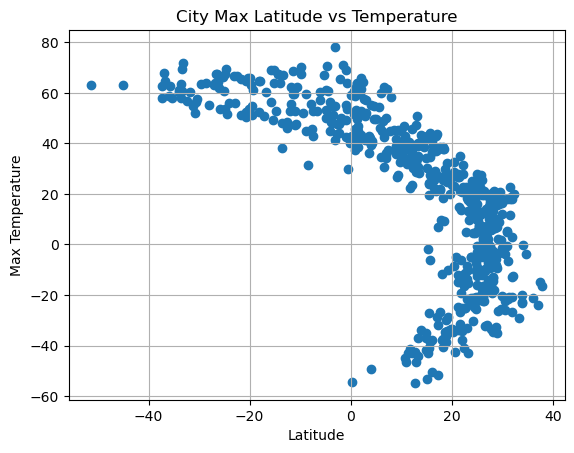

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"],city_data_df["Lat"])
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("City Max Latitude vs Temperature")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

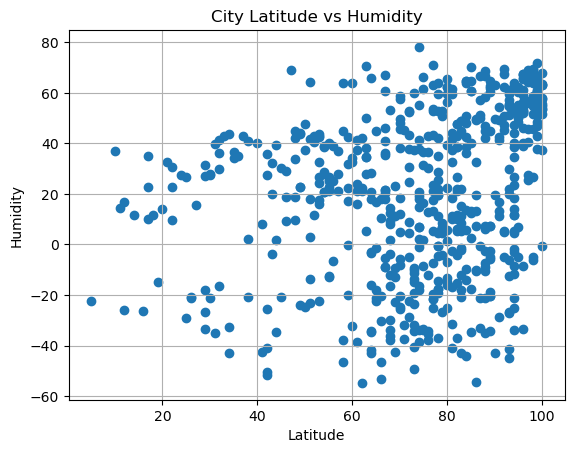

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"],city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

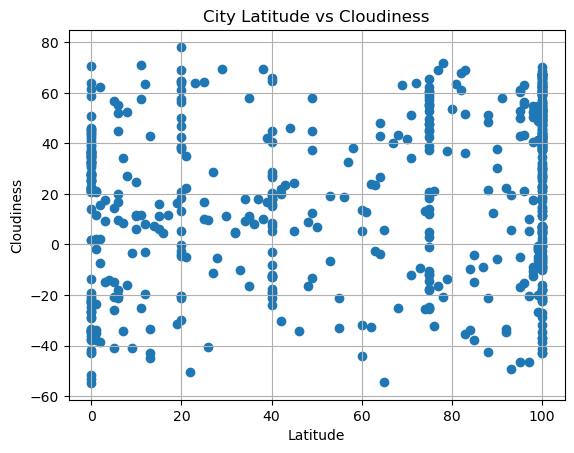

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"],city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

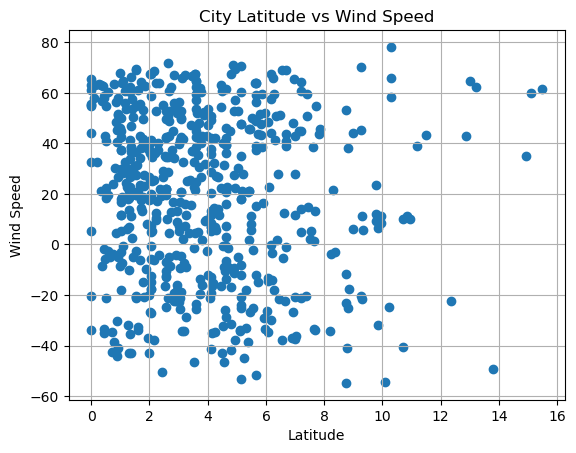

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"],city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs Wind Speed")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Define a function to create Linear Regression plots
def linear_regression(x,y,eqn_coordinates):
    r=st.pearsonr(x,y)
    print(f"The r-value is: {r[0]}")
    (slope,intercept,rvalue,pvalue,stderr)=linregress(x,y)
    regress_values=x*slope+intercept
    line_equation=f"y={slope:.2f}x +{intercept:.2f}"
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_equation,eqn_coordinates,fontsize=12,color="r")
    plt.scatter(x,y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kodiak,57.7900,-152.4072,2.73,70,20,6.17,US,1701977131
6,nizhniy odes,63.6445,54.8560,-33.64,100,81,0.79,RU,1701977132
8,guerrero negro,27.9769,-114.0611,21.31,57,0,6.99,MX,1701977133
9,albany,42.6001,-73.9662,-0.11,84,100,1.02,US,1701976946
11,bilibino,68.0546,166.4372,-37.02,100,82,1.00,RU,1701977134


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,0.19,86,65,10.08,GS,1701977131
2,nuriootpa,-34.4833,139.0000,28.20,44,92,6.08,AU,1701977131
3,adamstown,-25.0660,-130.1015,22.71,77,11,5.57,PN,1701977131
4,launceston,-41.4500,147.1667,11.80,93,100,4.12,AU,1701977121
5,mahina,-17.5065,-149.4890,27.87,78,75,2.06,PF,1701977132


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8631496113999382


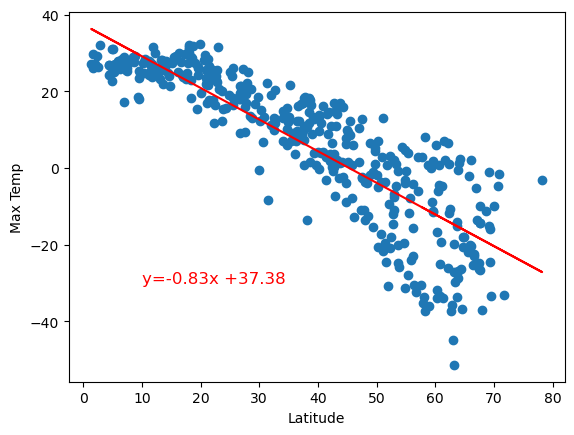

In [29]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df["Lat"].rename("Latitude"),northern_hemi_df["Max Temp"],(10,-30))


The r-value is: 0.6217303181908027


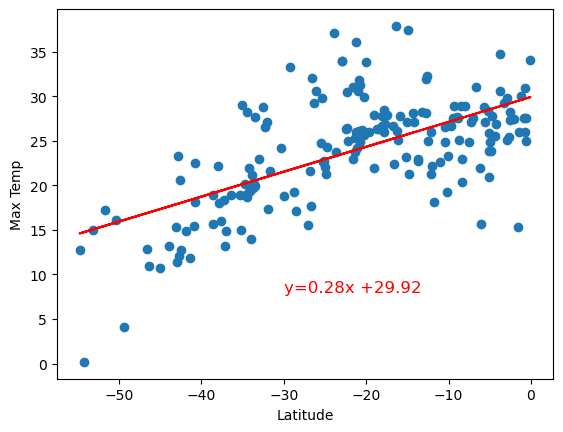

In [30]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df["Lat"].rename("Latitude"),southern_hemi_df["Max Temp"],(-30,8))


**Discussion about the linear relationship:** 

There is a strong negative correlation between temp and latitude in the Northern Hemisphere with a correlation coefficient of -0.8631496113999382

There is a strong positive correlation between temp and latitude in the Southern Hemisphere with a correlation coefficient of 0.6217303181908027

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3535812086387683


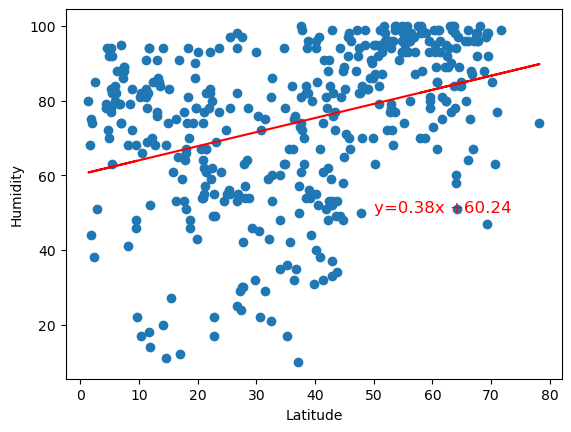

In [33]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"].rename("Latitude"),northern_hemi_df["Humidity"],(50,50))


The r-value is: 0.22279917843578914


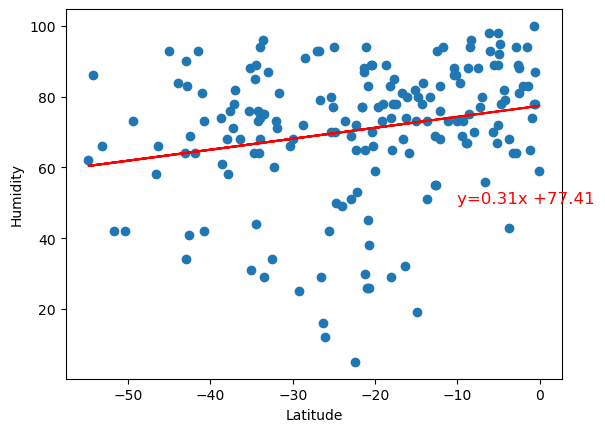

In [40]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"].rename("Latitude"),southern_hemi_df["Humidity"],(-10,50))


**Discussion about the linear relationship:** 

There is a strong positive correlation between humidity and latitude in the Northern Hemisphere with a correlation coefficient of 0.3535812086387683
There is a positive correlation between humidity and latitude in the Southern Hemisphere with a correlation coefficient of 0.22279917843578914

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2754168803667548


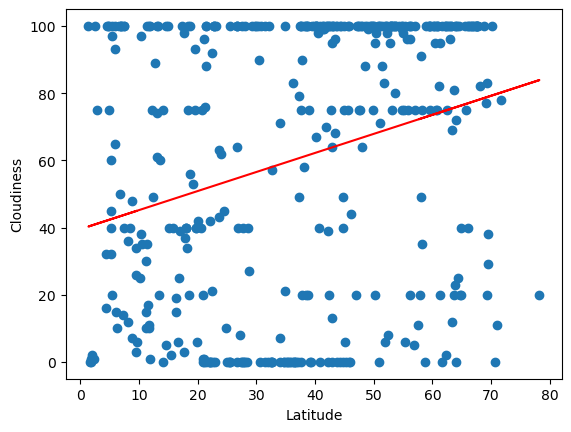

In [41]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"].rename("Latitude"),northern_hemi_df["Cloudiness"],(-50,50))


The r-value is: 0.28359714224100036


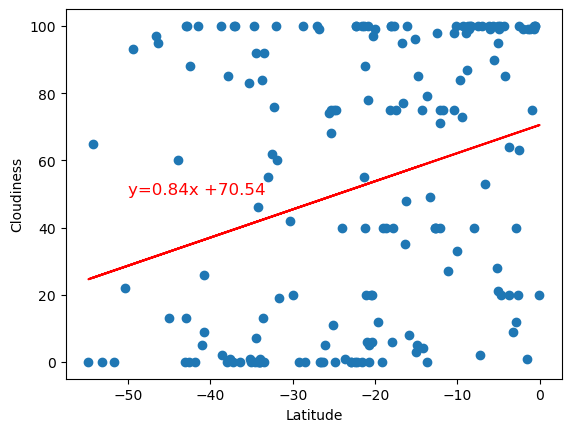

In [42]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"].rename("Latitude"),southern_hemi_df["Cloudiness"],(-50,50))


**Discussion about the linear relationship:** 

There is a positive correlation between cloudiness and latitude in the Northern Hemisphere with a correlation coefficient of 0.2754168803667548
There is a positive correlation between cloudiness and latitude in the Southern Hemisphere with a correlation coefficient of 0.28359714224100036

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.01446888932916571


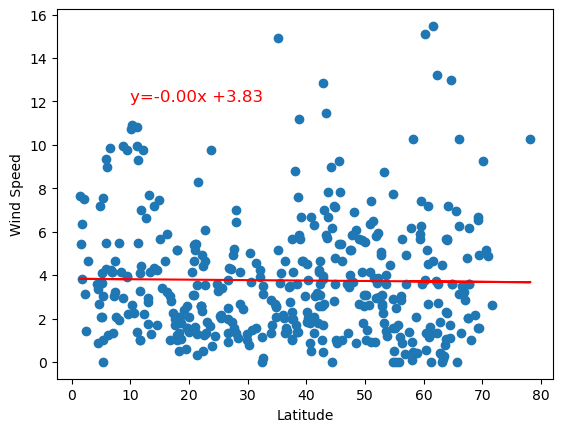

In [46]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"].rename("Latitude"),northern_hemi_df["Wind Speed"],(10,12))


The r-value is: -0.1844001756894132


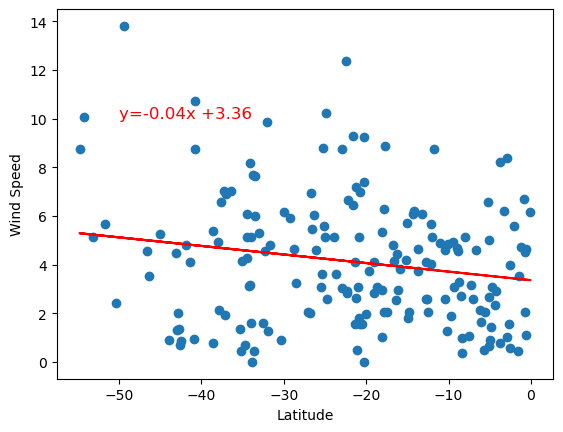

In [48]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"].rename("Latitude"),southern_hemi_df["Wind Speed"],(-50,10))


**Discussion about the linear relationship:** 

There is a negligible correlation between Wind Speed and latitude in the Northern Hemisphere with a correlation coefficient of -0.01446888932916571
There is a weak negative correlation between Wind Speed and latitude in the Southern Hemisphere with a correlation coefficient of -0.1844001756894132